<a href="https://colab.research.google.com/github/salim4n/kaggle_competition/blob/main/Tf_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
import numpy as np

data = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()

In [38]:
training_images.shape

(60000, 28, 28)

In [39]:
training_images.ndim

3

In [40]:
test_images.shape

(10000, 28, 28)

In [41]:
training_labels.shape

(60000,)

In [42]:
labels = ["t-shirt/top", "trouser", "pullover", "dress", "coat", "sandals",
          "shirt", "bag", "ankle boot"]

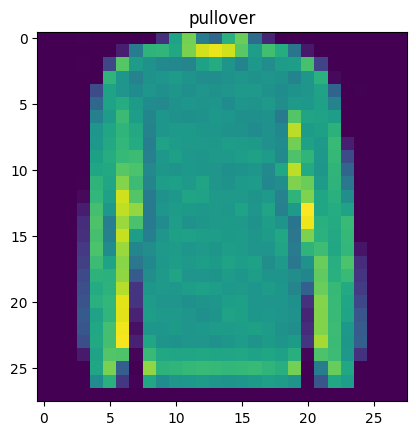

In [43]:
import matplotlib.pyplot as plt

plt.imshow(training_images[45])
plt.title(labels[training_labels[45]])
plt.show()

## Flatten (Applatire l'image)

In [44]:
a_train_images = training_images.reshape((60000, 28*28))
a_test_images = test_images.reshape((-1, 28*28))

## One Hot Encoding

In [45]:
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

## Normalisation

In [48]:
a_train_images = a_train_images / 255.0
a_test_images = a_test_images / 255.0

## 1er modèle de classification

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [50]:
model = Sequential([Dense(units=784,activation='sigmoid'),
                    Dense(units=10,activation='softmax')
                    ])
model.compile(loss='mse', optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
h = model.fit(a_train_images, training_labels, epochs=5,
              validation_data=(a_test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0887 - accuracy: 0.2562 - val_loss: 0.0867 - val_accuracy: 0.3407
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0847 - accuracy: 0.4228 - val_loss: 0.0826 - val_accuracy: 0.4803
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0803 - accuracy: 0.4963 - val_loss: 0.0779 - val_accuracy: 0.5099
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0752 - accuracy: 0.5209 - val_loss: 0.0727 - val_accuracy: 0.5417
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0702 - accuracy: 0.5561 - val_loss: 0.0679 - val_accuracy: 0.5940


### loss: 0.0702 - accuracy: 0.5561 - val_loss: 0.0679 - val_accuracy: 0.5940

## MSE  Versus Cross-entropy (Log Loss)

In [66]:
def mse(target, prediction):
  loss = (prediction - target)**2
  return loss

In [67]:
def log_loss(target, prediction):
  loss = -1 * np.log(prediction) #ici on imagine que toutes les target sont 1
  return loss

In [68]:
prediction = np.arange(0,1, 0.01)

In [69]:
target = np.ones_like(prediction)

In [70]:
loss_mse = mse(target, prediction)
loss_ce = log_loss(target, prediction)

<ipython-input-67-b095bc7aa5cd>:2: RuntimeWarning: divide by zero encountered in log
  loss = -1 * np.log(prediction) #ici on imagine que toutes les target sont 1


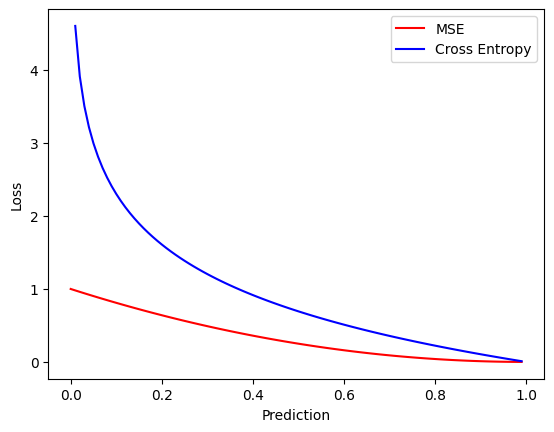

In [72]:
plt.plot(prediction, loss_mse, c='red', label='MSE')
plt.plot(prediction, loss_ce, c='blue', label='Cross Entropy')
plt.xlabel('Prediction')
plt.ylabel('Loss')
plt.legend(loc="upper right")
plt.show()

## Entraînement avec cross-entropy comme Loss

In [73]:
model = Sequential([Dense(units=784,activation='sigmoid'),
                    Dense(units=10,activation='softmax')
                    ])
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
h = model.fit(a_train_images, training_labels, epochs=5,
              validation_data=(a_test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 1.1317 - accuracy: 0.6710 - val_loss: 0.7952 - val_accuracy: 0.7287
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7044 - accuracy: 0.7613 - val_loss: 0.6677 - val_accuracy: 0.7668
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6200 - accuracy: 0.7861 - val_loss: 0.6092 - val_accuracy: 0.7835
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5749 - accuracy: 0.7994 - val_loss: 0.5779 - val_accuracy: 0.7967
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5450 - accuracy: 0.8099 - val_loss: 0.5537 - val_accuracy: 0.8043


### loss: 0.5450 - accuracy: 0.8099 - val_loss: 0.5537 - val_accuracy: 0.8043

## Nouvelle Fonction d'activation : RELU

In [89]:
values = np.arange(-5,5,0.01)

In [90]:
sig = tf.nn.sigmoid(values)

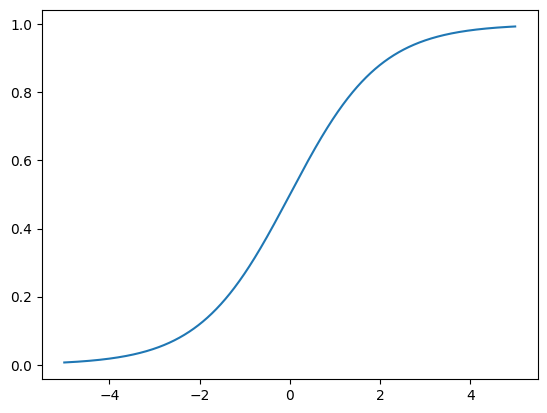

In [91]:
plt.plot(values,sig)
plt.show()

 Sigmoïd non utilisable sur ce genre

In [92]:
def relu(vect):
  return np.maximum(0,vect)

In [93]:
relu_value = relu(values)

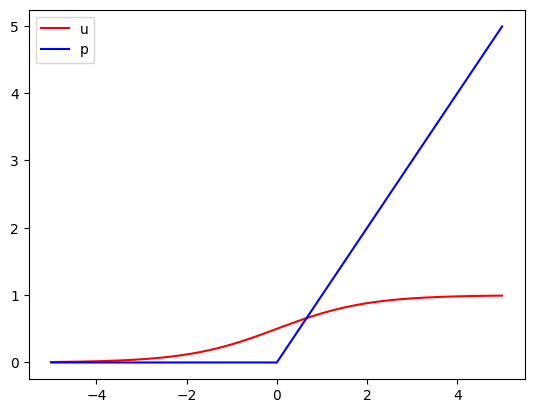

In [94]:
plt.plot(values,sig, c='r', label='sigmoid')
plt.plot(values, relu_value, c='b', label='relu')
plt.legend("upper right")
plt.show()

### Relu agit comme un filtre, toutes informations inferieur à 0 est filtrées

In [95]:
model = Sequential([Dense(units=784,activation='relu'),
                    Dense(units=10,activation='softmax')
                    ])
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
h = model.fit(a_train_images, training_labels, epochs=5,
              validation_data=(a_test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6985 - accuracy: 0.7789 - val_loss: 0.5447 - val_accuracy: 0.8154
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4954 - accuracy: 0.8328 - val_loss: 0.4918 - val_accuracy: 0.8315
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4533 - accuracy: 0.8448 - val_loss: 0.4653 - val_accuracy: 0.8344
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4290 - accuracy: 0.8536 - val_loss: 0.4576 - val_accuracy: 0.8387
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4112 - accuracy: 0.8584 - val_loss: 0.4422 - val_accuracy: 0.8410


### loss: 0.4112 - accuracy: 0.8584 - val_loss: 0.4422 - val_accuracy: 0.8410

### Plus d'epochs

In [96]:
model = Sequential([Dense(units=784,activation='relu'),
                    Dense(units=10,activation='softmax')
                    ])
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
h = model.fit(a_train_images, training_labels, epochs=20,
              validation_data=(a_test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3971 - accuracy: 0.8631 - val_loss: 0.4261 - val_accuracy: 0.8464
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3845 - accuracy: 0.8672 - val_loss: 0.4117 - val_accuracy: 0.8547
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3746 - accuracy: 0.8702 - val_loss: 0.4029 - val_accuracy: 0.8580
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3651 - accuracy: 0.8729 - val_loss: 0.4135 - val_accuracy: 0.8544
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3575 - accuracy: 0.8755 - val_loss: 0.3987 - val_accuracy: 0.8599
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3491 - accuracy: 0.8795 - val_loss: 0.3852 - val_accuracy: 0.8648
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3430 - accuracy: 0.8802 - val_loss: 0.3989 - val_ac

### loss: 0.2810 - accuracy: 0.9004 - val_loss: 0.3434 - val_accuracy: 0.8771


In [97]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 784)               615440    
                                                                 
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


## Réseau de neurones plus complexe

In [98]:
model = Sequential([Dense(units=784,activation='relu'),
                    Dense(units=128,activation='relu'),
                    Dense(units=10,activation='softmax')
                    ])
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
h = model.fit(a_train_images, training_labels, epochs=20,
              validation_data=(a_test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6707 - accuracy: 0.7791 - val_loss: 0.5142 - val_accuracy: 0.8199
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4677 - accuracy: 0.8369 - val_loss: 0.4876 - val_accuracy: 0.8286
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4229 - accuracy: 0.8520 - val_loss: 0.4300 - val_accuracy: 0.8446
Epoch 4/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3955 - accuracy: 0.8622 - val_loss: 0.4128 - val_accuracy: 0.8507
Epoch 5/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3756 - accuracy: 0.8694 - val_loss: 0.4214 - val_accuracy: 0.8462
Epoch 6/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3601 - accuracy: 0.8723 - val_loss: 0.3901 - val_accuracy: 0.8614
Epoch 7/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3462 - accuracy: 0.8781 - val_loss: 0.3831 - val_

### loss: 0.2473 - accuracy: 0.9112 - val_loss: 0.3333 - val_accuracy: 0.8813




In [101]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 784)               615440    
                                                                 
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 717,210
Trainable params: 717,210
Non-trainable params: 0
_________________________________________________________________


In [115]:
def plot_loss_curve(history):
  plt.plot(list(range(len(history['loss']))), history['loss'], label='Loss')
  plt.plot(list(range(len(history['val_loss']))), history['val_loss'], label='val loss')
  plt.xlabel('Epochs')
  plt.ylabel("Loss")
  plt.title("Loss Curve")
  plt.legend(loc="upper right")
  plt.show()

def plot_accuracy_curve(history):
  plt.plot(list(range(len(history['accuracy']))), history['accuracy'], label='Accuracy')
  plt.plot(list(range(len(history['val_accuracy']))), history['val_accuracy'], label='Val Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel("Accuracy")
  plt.title("Accuracy Curve")
  plt.legend(loc="lower right")
  plt.show()

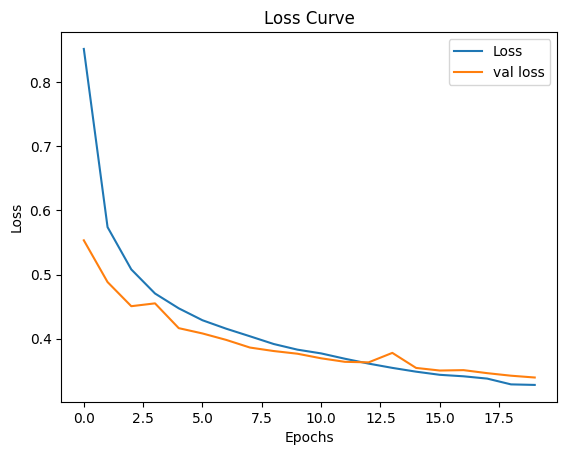

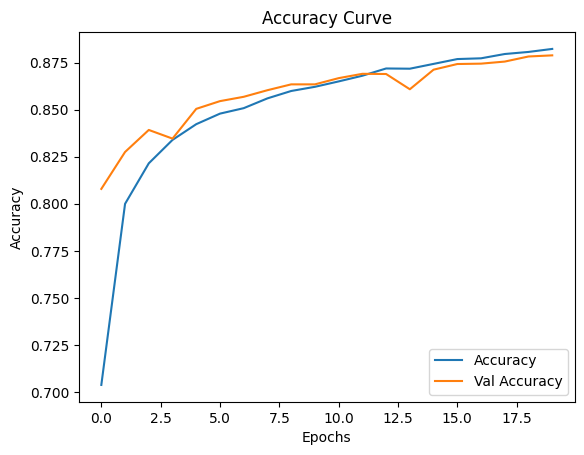

In [116]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

## Combattre le Overfitting : Dropout

In [103]:
dropout = tf.keras.layers.Dropout(rate=0.2, input_shape=(2,))

In [107]:
x = np.arange(1,11).reshape(5,2).astype(np.float32)

In [108]:
x

array([[ 1.,  2.],
       [ 3.,  4.],
       [ 5.,  6.],
       [ 7.,  8.],
       [ 9., 10.]], dtype=float32)

In [109]:
dropout(x, training=True)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ 1.25,  0.  ],
       [ 0.  ,  5.  ],
       [ 6.25,  7.5 ],
       [ 8.75, 10.  ],
       [11.25, 12.5 ]], dtype=float32)>

In [110]:
model = Sequential([Dense(units=784,activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128,activation='relu'),
                    tf.keras.layers.Dropout(0.3),
                    Dense(units=10,activation='softmax')
                    ])
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
h = model.fit(a_train_images, training_labels, epochs=20,
              validation_data=(a_test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.8520 - accuracy: 0.7038 - val_loss: 0.5534 - val_accuracy: 0.8079
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5740 - accuracy: 0.8000 - val_loss: 0.4883 - val_accuracy: 0.8275
Epoch 3/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5080 - accuracy: 0.8215 - val_loss: 0.4507 - val_accuracy: 0.8392
Epoch 4/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4705 - accuracy: 0.8339 - val_loss: 0.4551 - val_accuracy: 0.8346
Epoch 5/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4473 - accuracy: 0.8423 - val_loss: 0.4164 - val_accuracy: 0.8504
Epoch 6/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4287 - accuracy: 0.8479 - val_loss: 0.4081 - val_accuracy: 0.8545
Epoch 7/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4156 - accuracy: 0.8508 - val_loss: 0.3981 - val_a

In [111]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 784)               615440    
                                                                 
 dropout_2 (Dropout)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 717,210
Trainable params: 717,210
Non-trainable params: 0
_________________________________________________________________


### loss: 0.3279 - accuracy: 0.8822 - val_loss: 0.3394 - val_accuracy: 0.8788

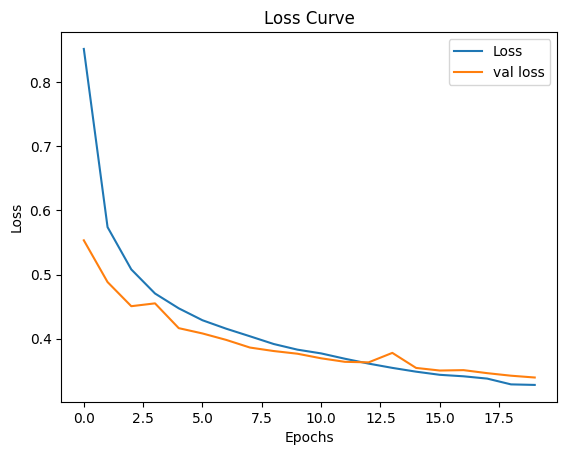

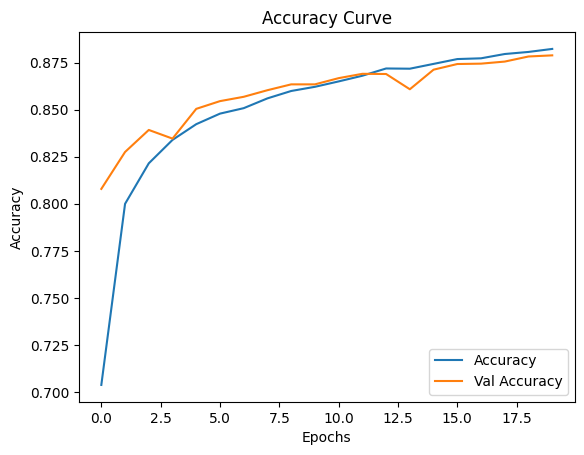

In [117]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

## Adam Optimisateur

In [ ]:
adam = tf.keras.optimizers.Adam(
    learning_rate=0.01
)

model = Sequential([Dense(units=784,activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128,activation='relu'),
                    tf.keras.layers.Dropout(0.3),
                    Dense(units=10,activation='softmax')
                    ])
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])
h = model.fit(a_train_images, training_labels, epochs=20,
              validation_data=(a_test_images, test_labels))

### loss: 0.9318 - accuracy: 0.6610 - val_loss: 0.7950 - val_accuracy: 0.7048

In [120]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 784)               615440    
                                                                 
 dropout_6 (Dropout)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 717,210
Trainable params: 717,210
Non-trainable params: 0
_________________________________________________________________


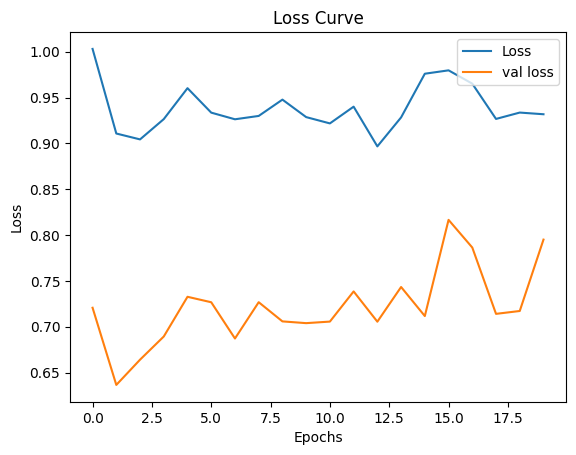

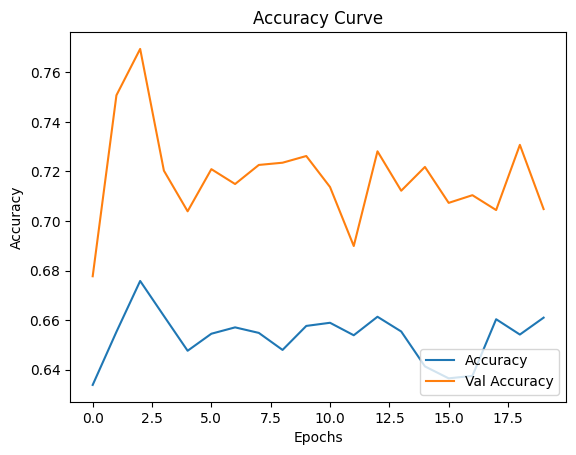

In [121]:
plot_loss_curve(h.history)
plot_accuracy_curve(h.history)

## Model Checkpoint

In [122]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [125]:
best_model = "best_model.h5"

model_ckp = ModelCheckpoint(filepath=best_model,
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True
                            )

In [ ]:
model = Sequential([Dense(units=784,activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128,activation='relu'),
                    tf.keras.layers.Dropout(0.3),
                    Dense(units=10,activation='softmax')
                    ])
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
h = model.fit(a_train_images, training_labels, epochs=30,
              validation_data=(a_test_images, test_labels),
              callbacks=[model_ckp])

In [127]:
model_save = tf.keras.models.load_model('best_model.h5')

In [128]:
model_save.evaluate(a_test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.3217 - accuracy: 0.8861


[0.3217436373233795, 0.8860999941825867]

### loss: 0.3217 - accuracy: 0.8861

In [129]:
stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)

In [ ]:
model = Sequential([Dense(units=784,activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128,activation='relu'),
                    tf.keras.layers.Dropout(0.3),
                    Dense(units=10,activation='softmax')
                    ])
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
h = model.fit(a_train_images, training_labels, epochs=1000,
              validation_data=(a_test_images, test_labels),
              callbacks=[model_ckp,stop])

In [133]:
model_save = tf.keras.models.load_model('best_model.h5')

In [134]:
model_save.evaluate(a_test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.3217 - accuracy: 0.8861


[0.3217436373233795, 0.8860999941825867]

### loss: 0.3217 - accuracy: 0.8861

In [153]:
a_test_images[58].shape

(784,)

In [154]:
np.argmax(test_labels[58])

8

In [155]:
labels[8]

'ankle boot'

In [156]:
pred = model_save.predict(a_test_images[58].reshape((1,784)))

1/1 [==============================] - 0s 37ms/step


In [157]:
pred

array([[4.3336759e-04, 2.6710206e-06, 8.2758925e-06, 2.4285202e-06,
        3.8814916e-05, 4.2103471e-05, 2.6023798e-04, 6.5613772e-06,
        9.9920291e-01, 2.5817117e-06]], dtype=float32)

In [158]:
np.argmax(pred)

8

In [160]:
labels[8]

'ankle boot'

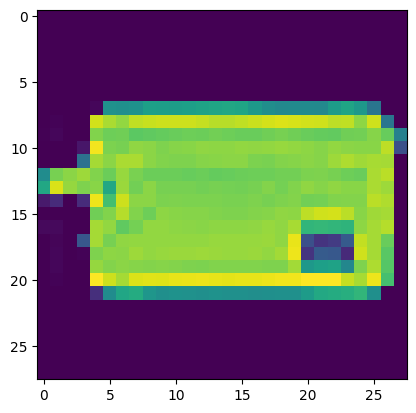

In [162]:
plt.imshow(test_images[58])
plt.show()

### ???????????